In [1]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True, parser="pandas")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

[[137   5]
 [ 40   5]]


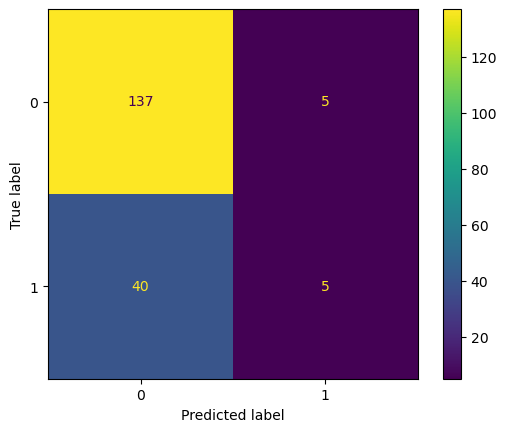

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           1       0.77      0.96      0.86       142
           2       0.50      0.11      0.18        45

    accuracy                           0.76       187
   macro avg       0.64      0.54      0.52       187
weighted avg       0.71      0.76      0.70       187



In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

df = datasets.load_iris()
X = df.data[: , :2]
y = df.target



In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X , y)

LogisticRegression(C=100000.0)

In [47]:
logreg.classes_

array([0, 1, 2])

In [49]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

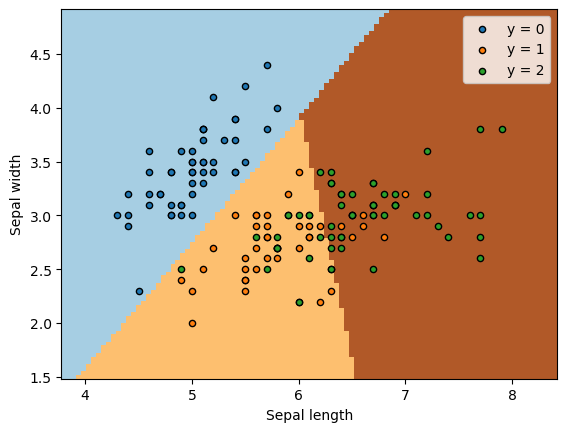

In [57]:
# ax = plt.subplots(figsize=(4, 3))
import numpy as np
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    plot_method="pcolormesh",
    shading="auto",
    response_method="predict",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired , label = )
colors = "bry"

for i in logreg.classes_:
    idx = np.where(y == i)
    # print(idx)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        # c=color,
        label= 'y = {0}'.format(i),
        # cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )



# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()
